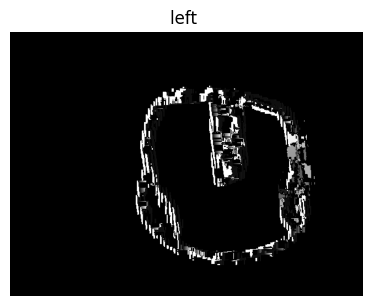

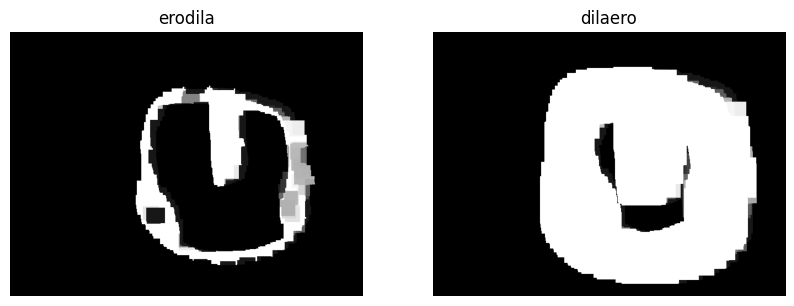

Text(0.5, 1.0, 'left ')

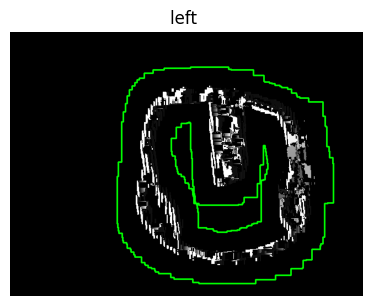

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2

img1 = cv2.imread('img1.png')

# Step 3: Convert images to grayscale
imgGray_1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imgGray_1, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('left ')

# Create a kernel
kernel = np.ones((5, 5), np.uint8)

# Erosion


# Dilation
dilation = cv2.dilate(imgGray_1, kernel, iterations=6)
erodila = cv2.erode(dilation, kernel, iterations=6)

dilaero = cv2.dilate(erodila, kernel, iterations=17)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(erodila, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('erodila')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dilaero, cv2.COLOR_BGR2RGB))
plt.title('dilaero')
plt.axis('off') 
plt.show()
# Display the original image, erosion, and dilation

# have countours aroud this shit 

_, binary_image = cv2.threshold(dilaero, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = img1.copy()
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)  # Draw all contours


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('left ')


Text(0.5, 1.0, 'left ')

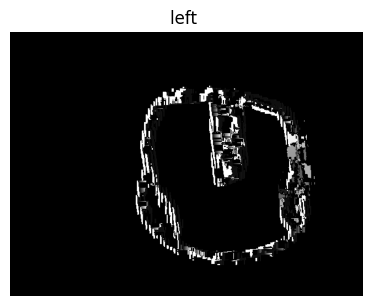

In [49]:
img1 = cv2.imread('img1.png')

# Step 3: Convert images to grayscale
imgGray_1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(imgGray_1, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('left ')






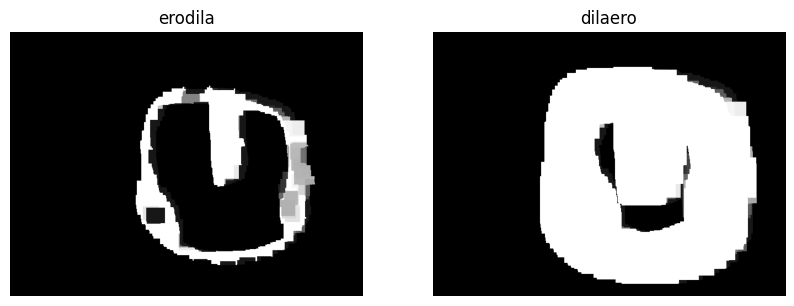

In [50]:
# Create a kernel
kernel = np.ones((5, 5), np.uint8)

# Erosion


# Dilation
dilation = cv2.dilate(imgGray_1, kernel, iterations=6)
erodila = cv2.erode(dilation, kernel, iterations=6)

dilaero = cv2.dilate(erodila, kernel, iterations=17)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(erodila, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('erodila')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dilaero, cv2.COLOR_BGR2RGB))
plt.title('dilaero')
plt.axis('off') 
plt.show()
# Display the original image, erosion, and dilation


Bounding Box: Top-left (194, 65), Top-right (587, 65), Bottom-left (194, 458), Bottom-right (587, 458)


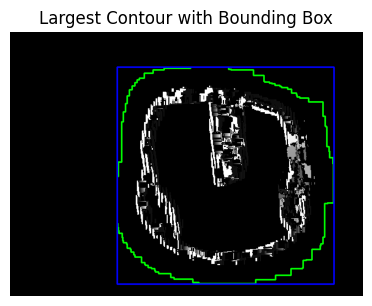

In [51]:
# have countours aroud this shit 

_, binary_image = cv2.threshold(dilaero, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



if contours:
    largest_contour = max(contours, key=cv2.contourArea)
    # Draw the largest contour
    contour_image = img1.copy()
    cv2.drawContours(contour_image, [largest_contour], -1, (0, 255, 0), 2)
    
    # Draw bounding box for the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)
    cv2.rectangle(contour_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
    print(f"Bounding Box: Top-left ({x}, {y}), Top-right ({x+w}, {y}), Bottom-left ({x}, {y+h}), Bottom-right ({x+w}, {y+h})")

    # Display the image with the largest contour and bounding box
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Largest Contour with Bounding Box')
    plt.show()
else:
    print("No contours found")